<a href="https://colab.research.google.com/github/AaronHdzGa/AaronHdzGa/blob/main/Pr%C3%A1ctica_1_Reglas_de_Asociaci%C3%B3n_%22Algoritmo_Apriori%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Práctica 1. Reglas de Asociación: "Algoritmo Apriori"**

Nombre: Hernández García Aarón 
No. Cuenta: 316142337
Email: aaronhdzga@gmail.com

In [1]:
#Instalación de Bibliotecas
!pip install apyori  # pip es un administrador de paquetes de Python. Se instala el paquete Apyori
import pandas as pd                 # Para la manipulación y análisis de los datos
import numpy as np                  # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt     # Para la generación de gráficas a partir de los datos
from apyori import apriori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=48994800c9b8057f3ab7810ce6f0d2a462ec0c90b03b9739095b7ead62c2f655
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


**Impotación de Datos**

In [2]:
DatosMovies = pd.read_csv('/content/movies.csv')

In [3]:
DatosMovies

,The Revenant,13 Hours,Allied,Zootopia,Jigsaw,Achorman,Grinch,Fast and Furious,Ghostbusters,Wolverine,Mad Max,John Wick,La La Land,The Good Dunosaur,Ninja Turtles,The Good Dunosaur Bad Moms,2 Guns,Inside Out,Valerian,Spiderman 3
0,Beirut,Martian,Get Out,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Deadpool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,X-Men,Allied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ninja Turtles,Moana,Ghost in the Shell,Ralph Breaks the Internet,John Wick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mad Max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7454,Big Sick,Looper,Hulk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7455,Beirut,Intern,Get Out,Hotel Transylvania,Mamma Mia,John Wick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7456,Captain America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7457,Green Lantern,John Wick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
DatosMovies = pd.read_csv('/content/movies.csv', header=None)
DatosMovies

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,The Revenant,13 Hours,Allied,Zootopia,Jigsaw,Achorman,Grinch,Fast and Furious,Ghostbusters,Wolverine,Mad Max,John Wick,La La Land,The Good Dunosaur,Ninja Turtles,The Good Dunosaur Bad Moms,2 Guns,Inside Out,Valerian,Spiderman 3
1,Beirut,Martian,Get Out,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Deadpool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,X-Men,Allied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ninja Turtles,Moana,Ghost in the Shell,Ralph Breaks the Internet,John Wick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7455,Big Sick,Looper,Hulk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7456,Beirut,Intern,Get Out,Hotel Transylvania,Mamma Mia,John Wick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7457,Captain America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7458,Green Lantern,John Wick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Procesamiento de datos**

In [5]:
#Se incluyen todas las transacciones en una sola lista
Transacciones = DatosMovies.values.reshape(-1).tolist() #-1 significa 'dimensión no conocida'
#Se crea una matriz (dataframe) usando la lista y se incluye una columna 'Frecuencia'
ListaM = pd.DataFrame(Transacciones)
ListaM

,0
0,The Revenant
1,13 Hours
2,Allied
3,Zootopia
4,Jigsaw
...,...
149195,NaN
149196,NaN
149197,NaN
149198,NaN


In [6]:
ListaM['Frecuencia'] = 1
ListaM

,0,Frecuencia
0,The Revenant,1
1,13 Hours,1
2,Allied,1
3,Zootopia,1
4,Jigsaw,1
...,...,...
149195,NaN,1
149196,NaN,1
149197,NaN,1
149198,NaN,1


In [7]:
#Se agrupa los elementos
ListaM = ListaM.groupby(by=[0], as_index=False).count().sort_values(by=['Frecuencia'], ascending=True) #Conteo
ListaM['Porcentaje'] = (ListaM['Frecuencia'] / ListaM['Frecuencia'].sum()) #Porcentaje
ListaM = ListaM.rename(columns={0 : 'Item'})
ListaM

,Item,Frecuencia,Porcentaje
106,Vampire in Brooklyn,3,0.000102
63,Lady Bird,5,0.000171
34,Finding Dory,7,0.000239
11,Bad Moms,14,0.000477
118,water spray,29,0.000989
...,...,...,...
25,Coco,1229,0.041915
44,Hotel Transylvania,1280,0.043655
103,Tomb Rider,1305,0.044507
37,Get Out,1346,0.045906


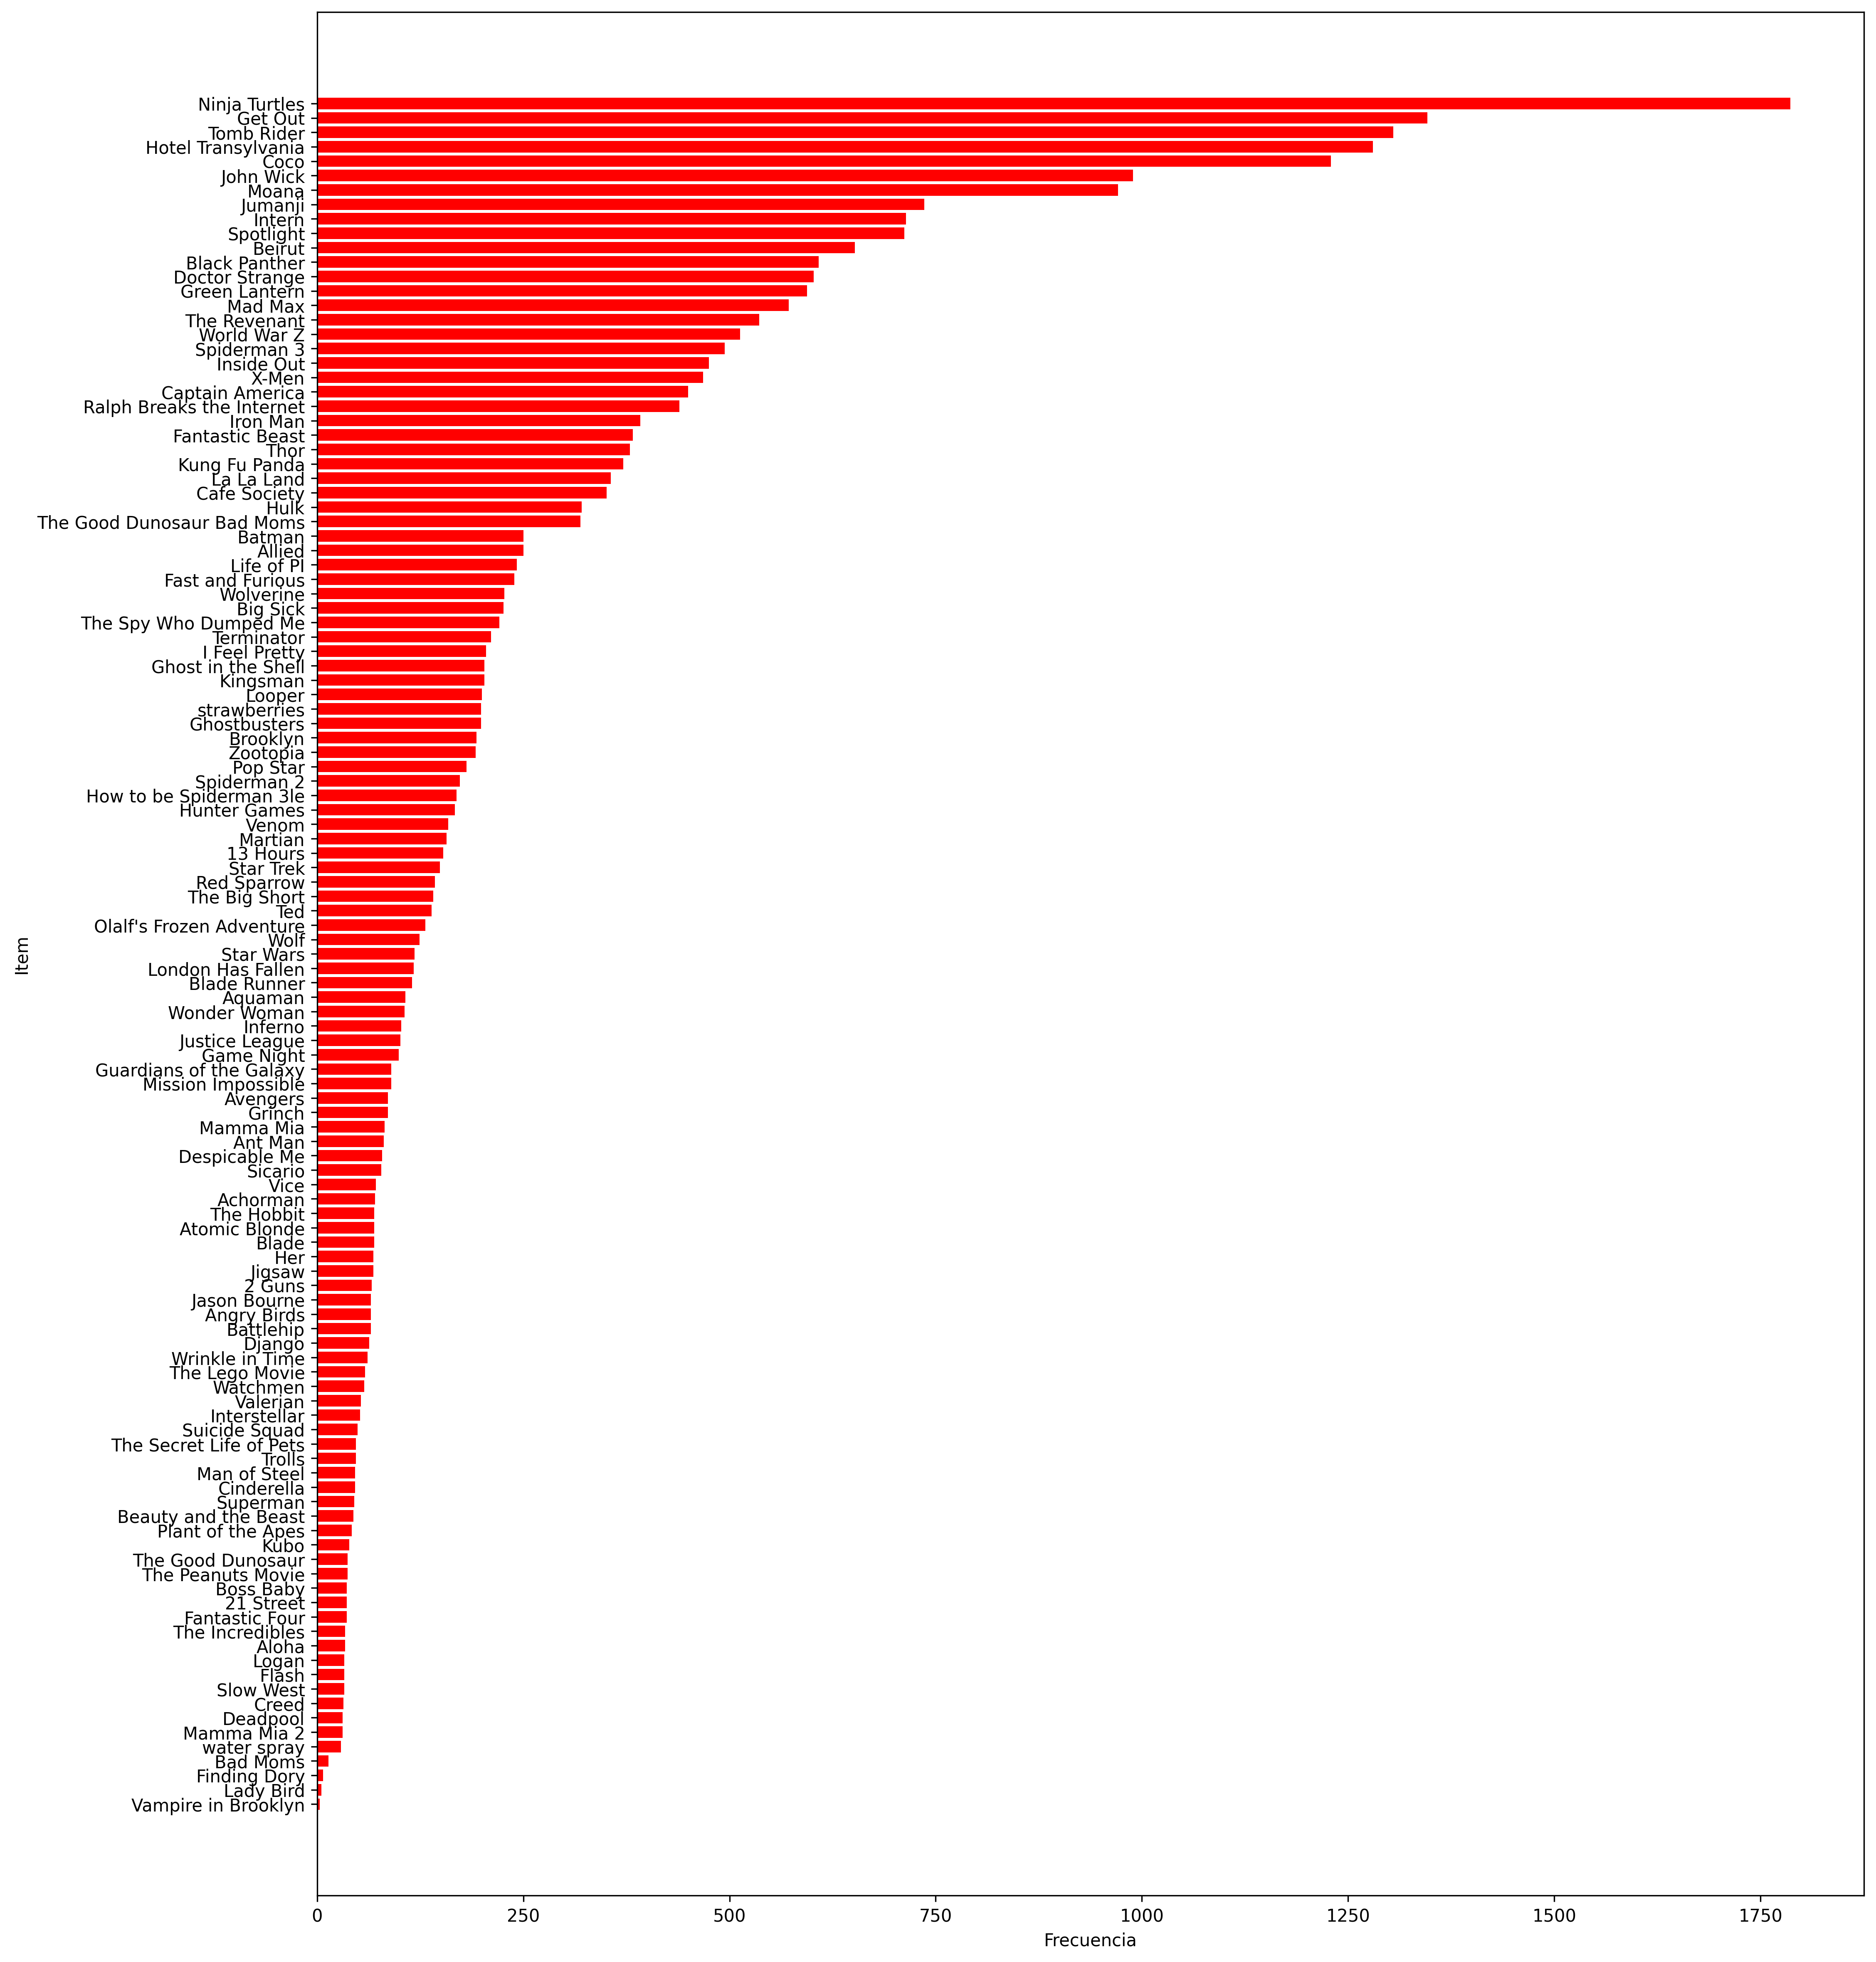

In [25]:
# Se genera un gráfico de barras
plt.figure(figsize=(16,20), dpi=300)
plt.ylabel('Item')
plt.xlabel('Frecuencia')
plt.barh(ListaM['Item'], width=ListaM['Frecuencia'], color='red')
plt.show()

# Nueva sección

In [9]:
#Se crea una lista de listas a partir del dataframe y se remueven los 'NaN'
#level=0 especifica desde el primer índice
MoviesLista = DatosMovies.stack().groupby(level=0).apply(list).tolist()
MoviesLista 

[['The Revenant',
  '13 Hours',
  'Allied',
  'Zootopia',
  'Jigsaw',
  'Achorman',
  'Grinch',
  'Fast and Furious',
  'Ghostbusters',
  'Wolverine',
  'Mad Max',
  'John Wick',
  'La La Land',
  'The Good Dunosaur',
  'Ninja Turtles',
  'The Good Dunosaur Bad Moms',
  '2 Guns',
  'Inside Out',
  'Valerian',
  'Spiderman 3'],
 ['Beirut', 'Martian', 'Get Out'],
 ['Deadpool'],
 ['X-Men', 'Allied'],
 ['Ninja Turtles',
  'Moana',
  'Ghost in the Shell',
  'Ralph Breaks the Internet',
  'John Wick'],
 ['Mad Max'],
 ['The Spy Who Dumped Me', 'Hotel Transylvania'],
 ['Thor', 'London Has Fallen', 'The Lego Movie'],
 ['Intern', 'Tomb Rider', 'John Wick'],
 ['Hotel Transylvania'],
 ['Get Out', 'Suicide Squad'],
 ['Doctor Strange'],
 ['X-Men', 'Beirut', 'Ninja Turtles', 'Get Out', 'Fantastic Beast'],
 ['Tomb Rider', 'Cafe Society', 'Doctor Strange'],
 ['Ninja Turtles', 'The Good Dunosaur Bad Moms'],
 ['Ninja Turtles'],
 ['The Revenant',
  'Coco',
  'Captain America',
  'La La Land',
  'Spiderman

**Aplicación del algoritmo Apriori**

In [10]:
ReglasC1 = apriori(MoviesLista, 
                   min_support=0.01, 
                   min_confidence=0.3, 
                   min_lift=2)

In [11]:
ResultadosC1 = list(ReglasC1)
print(len(ResultadosC1)) #Total de reglas encontradas 

9


In [12]:
ResultadosC1

[RelationRecord(items=frozenset({'Jumanji', 'Kung Fu Panda'}), support=0.0160857908847185, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Kung Fu Panda'}), items_add=frozenset({'Jumanji'}), confidence=0.3234501347708895, lift=3.2784483768897226)]),
 RelationRecord(items=frozenset({'Tomb Rider', 'Jumanji'}), support=0.03941018766756032, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Jumanji'}), items_add=frozenset({'Tomb Rider'}), confidence=0.3994565217391304, lift=2.283483258370814)]),
 RelationRecord(items=frozenset({'Moana', 'Thor'}), support=0.015281501340482574, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Thor'}), items_add=frozenset({'Moana'}), confidence=0.3007915567282322, lift=2.3109217437617016)]),
 RelationRecord(items=frozenset({'Tomb Rider', 'Terminator'}), support=0.01032171581769437, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Terminator'}), items_add=frozenset({'Tomb Rider'}), confidence=0.36492890995260663, lift

In [13]:
pd.DataFrame(ResultadosC1)

,items,support,ordered_statistics
0,"(Jumanji, Kung Fu Panda)",0.016086,"[((Kung Fu Panda), (Jumanji), 0.32345013477088..."
1,"(Tomb Rider, Jumanji)",0.039410,"[((Jumanji), (Tomb Rider), 0.3994565217391304,..."
2,"(Moana, Thor)",0.015282,"[((Thor), (Moana), 0.3007915567282322, 2.31092..."
3,"(Tomb Rider, Terminator)",0.010322,"[((Terminator), (Tomb Rider), 0.36492890995260..."
4,"(Ninja Turtles, Get Out, Jumanji)",0.010188,"[((Get Out, Jumanji), (Ninja Turtles), 0.50666..."
5,"(Moana, Intern, Ninja Turtles)",0.011126,"[((Intern, Ninja Turtles), (Moana), 0.30970149..."
6,"(Moana, Ninja Turtles, Jumanji)",0.011126,"[((Moana, Jumanji), (Ninja Turtles), 0.5030303..."
7,"(Tomb Rider, Ninja Turtles, Jumanji)",0.017158,"[((Ninja Turtles, Jumanji), (Tomb Rider), 0.41..."
8,"(Ninja Turtles, Spiderman 3, Tomb Rider)",0.010322,"[((Ninja Turtles, Spiderman 3), (Tomb Rider), ..."


In [14]:
print(ResultadosC1[0])


RelationRecord(items=frozenset({'Jumanji', 'Kung Fu Panda'}), support=0.0160857908847185, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Kung Fu Panda'}), items_add=frozenset({'Jumanji'}), confidence=0.3234501347708895, lift=3.2784483768897226)])


In [15]:
print(ResultadosC1[1])
print(ResultadosC1[2])


RelationRecord(items=frozenset({'Tomb Rider', 'Jumanji'}), support=0.03941018766756032, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Jumanji'}), items_add=frozenset({'Tomb Rider'}), confidence=0.3994565217391304, lift=2.283483258370814)])
RelationRecord(items=frozenset({'Moana', 'Thor'}), support=0.015281501340482574, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Thor'}), items_add=frozenset({'Moana'}), confidence=0.3007915567282322, lift=2.3109217437617016)])


In [16]:
for item in ResultadosC1:
  #El primer índice de la lista
  Emparejar = item[0]
  
  items = [x for x in Emparejar]
  print("Regla: " + str(item[0]))

  #El segundo índice de la lista
  print("Soporte: " + str(item[1]))

  #El tercer índice de la lista
  print("Confianza: " + str(item[2][0][2]))
  print("Lift: " + str(item[2][0][3])) 
  print("=====================================") 

Regla: frozenset({'Jumanji', 'Kung Fu Panda'})
Soporte: 0.0160857908847185
Confianza: 0.3234501347708895
Lift: 3.2784483768897226
Regla: frozenset({'Tomb Rider', 'Jumanji'})
Soporte: 0.03941018766756032
Confianza: 0.3994565217391304
Lift: 2.283483258370814
Regla: frozenset({'Moana', 'Thor'})
Soporte: 0.015281501340482574
Confianza: 0.3007915567282322
Lift: 2.3109217437617016
Regla: frozenset({'Tomb Rider', 'Terminator'})
Soporte: 0.01032171581769437
Confianza: 0.36492890995260663
Lift: 2.0861070254762035
Regla: frozenset({'Ninja Turtles', 'Get Out', 'Jumanji'})
Soporte: 0.010187667560321715
Confianza: 0.5066666666666666
Lift: 2.1163120567375886
Regla: frozenset({'Moana', 'Intern', 'Ninja Turtles'})
Soporte: 0.011126005361930294
Confianza: 0.30970149253731344
Lift: 2.37937500960696
Regla: frozenset({'Moana', 'Ninja Turtles', 'Jumanji'})
Soporte: 0.011126005361930294
Confianza: 0.5030303030303029
Lift: 2.1011232142251175
Regla: frozenset({'Tomb Rider', 'Ninja Turtles', 'Jumanji'})
Soport

Configuración 2 

In [18]:
ReglasC2 = apriori(MoviesLista, 
                   min_support=0.028, 
                   min_confidence=0.3, 
                   min_lift = 1.1)

In [19]:
ResultadosC2 = list(ReglasC2)
print(len(ResultadosC2))

8


In [20]:
ResultadosC2 

[RelationRecord(items=frozenset({'Beirut', 'Get Out'}), support=0.028954423592493297, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Beirut'}), items_add=frozenset({'Get Out'}), confidence=0.3312883435582822, lift=1.8361151879233173)]),
 RelationRecord(items=frozenset({'Ninja Turtles', 'Coco'}), support=0.05294906166219839, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Coco'}), items_add=frozenset({'Ninja Turtles'}), confidence=0.32166123778501626, lift=1.3435570178478284)]),
 RelationRecord(items=frozenset({'Intern', 'Ninja Turtles'}), support=0.035924932975871314, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Intern'}), items_add=frozenset({'Ninja Turtles'}), confidence=0.3753501400560224, lift=1.5678118951948081)]),
 RelationRecord(items=frozenset({'Ninja Turtles', 'Jumanji'}), support=0.04115281501340483, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Jumanji'}), items_add=frozenset({'Ninja Turtles'}), confidence=0.4171195652173

In [21]:
pd.DataFrame(ResultadosC2)

,items,support,ordered_statistics
0,"(Beirut, Get Out)",0.028954,"[((Beirut), (Get Out), 0.3312883435582822, 1.8..."
1,"(Ninja Turtles, Coco)",0.052949,"[((Coco), (Ninja Turtles), 0.32166123778501626..."
2,"(Intern, Ninja Turtles)",0.035925,"[((Intern), (Ninja Turtles), 0.375350140056022..."
3,"(Ninja Turtles, Jumanji)",0.041153,"[((Jumanji), (Ninja Turtles), 0.41711956521739..."
4,"(Tomb Rider, Jumanji)",0.039410,"[((Jumanji), (Tomb Rider), 0.3994565217391304,..."
5,"(Moana, Ninja Turtles)",0.048257,"[((Moana), (Ninja Turtles), 0.3707518022657054..."
6,"(Spotlight, Ninja Turtles)",0.033914,"[((Spotlight), (Ninja Turtles), 0.355337078651..."
7,"(Ninja Turtles, Tomb Rider)",0.060054,"[((Tomb Rider), (Ninja Turtles), 0.34329501915..."


In [22]:
print(ResultadosC2[0])

RelationRecord(items=frozenset({'Beirut', 'Get Out'}), support=0.028954423592493297, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Beirut'}), items_add=frozenset({'Get Out'}), confidence=0.3312883435582822, lift=1.8361151879233173)])


In [23]:
print(ResultadosC2[1])
print(ResultadosC2[2])

RelationRecord(items=frozenset({'Ninja Turtles', 'Coco'}), support=0.05294906166219839, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Coco'}), items_add=frozenset({'Ninja Turtles'}), confidence=0.32166123778501626, lift=1.3435570178478284)])
RelationRecord(items=frozenset({'Intern', 'Ninja Turtles'}), support=0.035924932975871314, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Intern'}), items_add=frozenset({'Ninja Turtles'}), confidence=0.3753501400560224, lift=1.5678118951948081)])


In [24]:
for item in ResultadosC2:
  #El primer índice de la lista
  Emparejar = item[0]
  items = [x for x in Emparejar]
  print("Regla: " + str(item[0]))

  #El segundo índice de la lista
  print("Soporte: " + str(item[1]))

  #El tercer índice de la lista
  print("Confianza: " + str(item[2][0][2]))
  print("Lift: " + str(item[2][0][3])) 
  print("=====================================") 

Regla: frozenset({'Beirut', 'Get Out'})
Soporte: 0.028954423592493297
Confianza: 0.3312883435582822
Lift: 1.8361151879233173
Regla: frozenset({'Ninja Turtles', 'Coco'})
Soporte: 0.05294906166219839
Confianza: 0.32166123778501626
Lift: 1.3435570178478284
Regla: frozenset({'Intern', 'Ninja Turtles'})
Soporte: 0.035924932975871314
Confianza: 0.3753501400560224
Lift: 1.5678118951948081
Regla: frozenset({'Ninja Turtles', 'Jumanji'})
Soporte: 0.04115281501340483
Confianza: 0.4171195652173913
Lift: 1.742279930863236
Regla: frozenset({'Tomb Rider', 'Jumanji'})
Soporte: 0.03941018766756032
Confianza: 0.3994565217391304
Lift: 2.283483258370814
Regla: frozenset({'Moana', 'Ninja Turtles'})
Soporte: 0.04825737265415549
Confianza: 0.3707518022657054
Lift: 1.5486049523528347
Regla: frozenset({'Spotlight', 'Ninja Turtles'})
Soporte: 0.0339142091152815
Confianza: 0.3553370786516854
Lift: 1.4842187047825157
Regla: frozenset({'Ninja Turtles', 'Tomb Rider'})
Soporte: 0.060053619302949064
Confianza: 0.3432